In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rc('xtick', labelsize = 20) # x축 라벨 크기
plt.rc('ytick', labelsize = 20) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/preprocessing/final.csv",encoding ="euc-kr")
df = df.loc[df['행정구'] == '광진구'].reset_index(drop = True)
df.head(10)

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,광진구,화양동,37,8,0,3,1,24,0,0,...,52.0,359,904,17933,4334,1739,1540,26809,3,2
1,광진구,군자동,12,1,0,3,0,25,0,0,...,54.0,813,1054,9473,5369,2525,2032,21266,0,0
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,54.0,652,696,5831,4522,2207,1645,15553,0,0
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,51.0,976,1333,7462,6429,3013,2173,21386,0,0
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,51.0,667,880,5303,4986,2423,1902,16161,1,0
5,광진구,중곡4동,12,4,0,0,1,17,0,0,...,55.0,1200,1814,8342,9108,4582,3390,28436,0,0
6,광진구,능동,8,2,0,0,0,8,0,0,...,55.0,519,517,5043,3113,1318,1091,11601,3,2
7,광진구,광장동,6,0,0,1,2,14,0,0,...,55.0,2749,5434,7404,13051,3291,2516,34445,1,0
8,광진구,자양1동,13,0,0,3,2,15,0,1,...,55.0,843,1463,8049,7014,3050,2366,22785,0,0
9,광진구,자양2동,7,1,0,1,1,6,0,0,...,54.0,1397,1754,7173,7830,3693,2512,24359,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 72 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             15 non-null     object 
 1   행정동             15 non-null     object 
 2   갈비/삼겹살          15 non-null     int64  
 3   곱창/양구이전문        15 non-null     int64  
 4   기사식당            15 non-null     int64  
 5   기타고기요리          15 non-null     int64  
 6   냉면집             15 non-null     int64  
 7   닭/오리요리          15 non-null     int64  
 8   돌솥/비빕밥전문점       15 non-null     int64  
 9   두부요리전문          15 non-null     int64  
 10  버섯전문점           15 non-null     int64  
 11  별식/퓨전요리         15 non-null     int64  
 12  보리밥전문           15 non-null     int64  
 13  부대찌개/섞어찌개       15 non-null     int64  
 14  부페              15 non-null     int64  
 15  분식              15 non-null     int64  
 16  설렁탕집            15 non-null     int64  
 17  순두부전문           15 non-null     int64

- 총 72개의 컬럼
- 강서구의 경우 15개의 행정동 -> 각 컬럼마다 **15개**의 데이터가 존재해야 한다.
- 결측치 존재 x

# **2. 업종 수와 각 변수들 간의 상관관계 파악하기**

- 상관계수는 **-1부터 1** 사이로 구성된다.
- 0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있음
- 상관계수의 절댓값이 **0.3 이상**인 업종들 위주로 파악

**✔ df.corr() 적용 시 NaN**
- 피어쓴 상관계수 계산 식은 아래와 같음
- 따라서, 모든 행의 데이터 값이 동일한 경우 표준편차가 0이 되어 분모가 0으로 계산된다. 
    - 이로 인해, 원본 데이터에 결측치가 없어도 NaN이 발생될 수 있다.

![corr](pearson.jpg)

In [5]:
empty = pd.DataFrame(columns = {'업종','변수','상관계수'}) 
empty # 가나다 순으로 컬럼명이 붙는다.

,변수,업종,상관계수


In [6]:
empty.columns = ['업종','변수','상관계수']
empty

,업종,변수,상관계수


In [7]:
### 33개의 업종에 대해 각 업종과의 상관계수가 0.3 이상인 변수만 추출하는 함수

def selection(df):
    result_df = pd.DataFrame(columns = {'업종','변수','상관계수'}) # 빈 DataFrame
    result_df.columns = ['업종','변수','상관계수'] # 컬럼 순서 변경
    
    sectors = df.columns # 전체 33개의 업종
    
    for i in range(len(sectors)):
        sector = sectors[i] # 각 업종
        variables = list(df.loc[df[sector] >= 0.3, sector].index) + list(df.loc[df[sector] <= -0.3, sector].index) # 상관계수의 절댓값이 0.3 이상인 변수들
        corrs = list(df.loc[df[sector] >= 0.3, sector].values) + list(df.loc[df[sector] <= -0.3, sector].values) # 각각의 상관계수
        
        for j in range(len(variables)):
            result_df.loc[len(result_df)] = [sector,variables[j],corrs[j]] # 행 추가
    
    return result_df

## **2-1. 광진구**
- 각각의 데이터셋 별로 변수들의 영향력 확인

### **a) 생활인구**

In [8]:
### 필요한 데이터 추출

df_life = df.iloc[:,:49]
df_life.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,40~50대 생활인구_평일,60대 생활인구_평일,70대 이상 생활인구_평일,총생활인구수_주말,10대 미만 생활인구_주말,10대 생활인구_주말,20~30대 생활인구_주말,40~50대 생활인구_주말,60대 생활인구_주말,70대 이상 생활인구_주말
0,광진구,화양동,37,8,0,3,1,24,0,0,...,190015.5586,56700.56622,51604.09050,988400.1148,26187.87891,74929.49211,607657.3720,178496.5177,52596.65019,48532.20180
1,광진구,군자동,12,1,0,3,0,25,0,0,...,122876.2834,39182.51583,37045.32007,476190.5778,19773.82196,33454.26393,231335.3952,117307.1767,38236.44543,36083.47560
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,110283.2745,41519.42041,34583.85866,370308.3067,26042.82654,21943.32766,137570.6749,108559.1816,41363.99704,34828.30075
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,133027.3724,46692.10411,44563.66902,441711.3450,29623.29791,32995.81913,151825.1510,135543.3856,46631.89436,45091.79711
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,114009.0411,43112.66054,43360.33162,370193.0944,22630.75169,25117.61561,118311.2052,116367.6022,44038.81303,43727.10538


In [9]:
### 상관계수 파악

life_corr = df_life.corr().iloc[33:,:33]
life_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총생활인구수_평일,0.584644,0.232610,-0.194468,0.237425,0.148900,0.498621,-0.058030,-0.046294,NaN,0.473254,...,0.349969,0.257771,-0.292956,0.838560,0.215572,0.586842,0.660472,0.410535,-0.142503,0.649152
10대 미만 생활인구_평일,-0.339902,-0.388867,0.005917,-0.349007,0.333531,-0.184970,0.136512,-0.109570,NaN,-0.333772,...,-0.284766,-0.361066,0.066358,-0.043005,-0.146886,0.132864,-0.324394,-0.368791,-0.199806,-0.220612
10대 생활인구_평일,0.046154,-0.170939,-0.170512,-0.066733,0.301019,0.142838,0.025996,-0.054367,NaN,-0.007497,...,-0.063893,-0.146670,-0.185370,0.376788,0.002692,0.329178,0.138979,0.009092,-0.287525,0.160183
20~30대 생활인구_평일,0.874417,0.506990,-0.204454,0.409341,-0.127702,0.612654,-0.109155,-0.085433,NaN,0.696052,...,0.490950,0.402578,-0.362541,0.943376,0.377891,0.542196,0.917195,0.769328,-0.182562,0.923197
40~50대 생활인구_평일,0.115889,-0.111902,-0.054028,0.077783,0.349932,0.245675,-0.014007,0.035521,NaN,0.193450,...,0.112518,0.127208,-0.140273,0.432399,-0.108294,0.414422,0.223095,-0.081996,0.052071,0.128501
60대 생활인구_평일,0.035505,0.005200,-0.045372,-0.036927,0.316463,0.182089,0.003290,0.146742,NaN,0.040365,...,0.257900,0.179330,0.070148,0.255663,0.027587,0.315598,0.056518,-0.246896,0.286089,0.008314
70대 이상 생활인구_평일,0.015091,0.007314,-0.168393,-0.047388,0.323403,0.090042,-0.015869,0.134396,NaN,-0.092813,...,0.232125,0.091704,0.080353,0.210252,0.145372,0.252417,-0.016139,-0.244694,0.175245,-0.004905
총생활인구수_주말,0.579443,0.271293,-0.169758,0.219583,0.183380,0.475746,-0.046323,-0.025630,NaN,0.456141,...,0.385289,0.270808,-0.246896,0.827884,0.223398,0.592633,0.635577,0.353791,-0.093795,0.639226
10대 미만 생활인구_주말,-0.304655,-0.318031,0.115448,-0.331250,0.278782,-0.070985,0.094743,-0.099059,NaN,-0.190441,...,-0.225240,-0.261487,0.093538,0.036571,-0.203236,0.171209,-0.236952,-0.329505,-0.124297,-0.164514
10대 생활인구_주말,0.075870,-0.115096,-0.069669,-0.036338,0.256538,0.213307,0.002177,-0.030438,NaN,0.130353,...,-0.047980,-0.058881,-0.166972,0.447743,-0.065504,0.388001,0.220983,0.041983,-0.221742,0.219250


In [10]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_life = selection(life_corr)
result_life.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20~30대 생활인구_주말,0.892803
1,갈비/삼겹살,20~30대 생활인구_평일,0.874417
2,갈비/삼겹살,총생활인구수_평일,0.584644
3,갈비/삼겹살,총생활인구수_주말,0.579443
4,갈비/삼겹살,10대 미만 생활인구_주말,-0.304655
...,...,...,...
133,해장국/감자탕,60대 생활인구_주말,0.330635
134,황태전문,20~30대 생활인구_주말,0.935617
135,황태전문,20~30대 생활인구_평일,0.923197
136,황태전문,총생활인구수_평일,0.649152


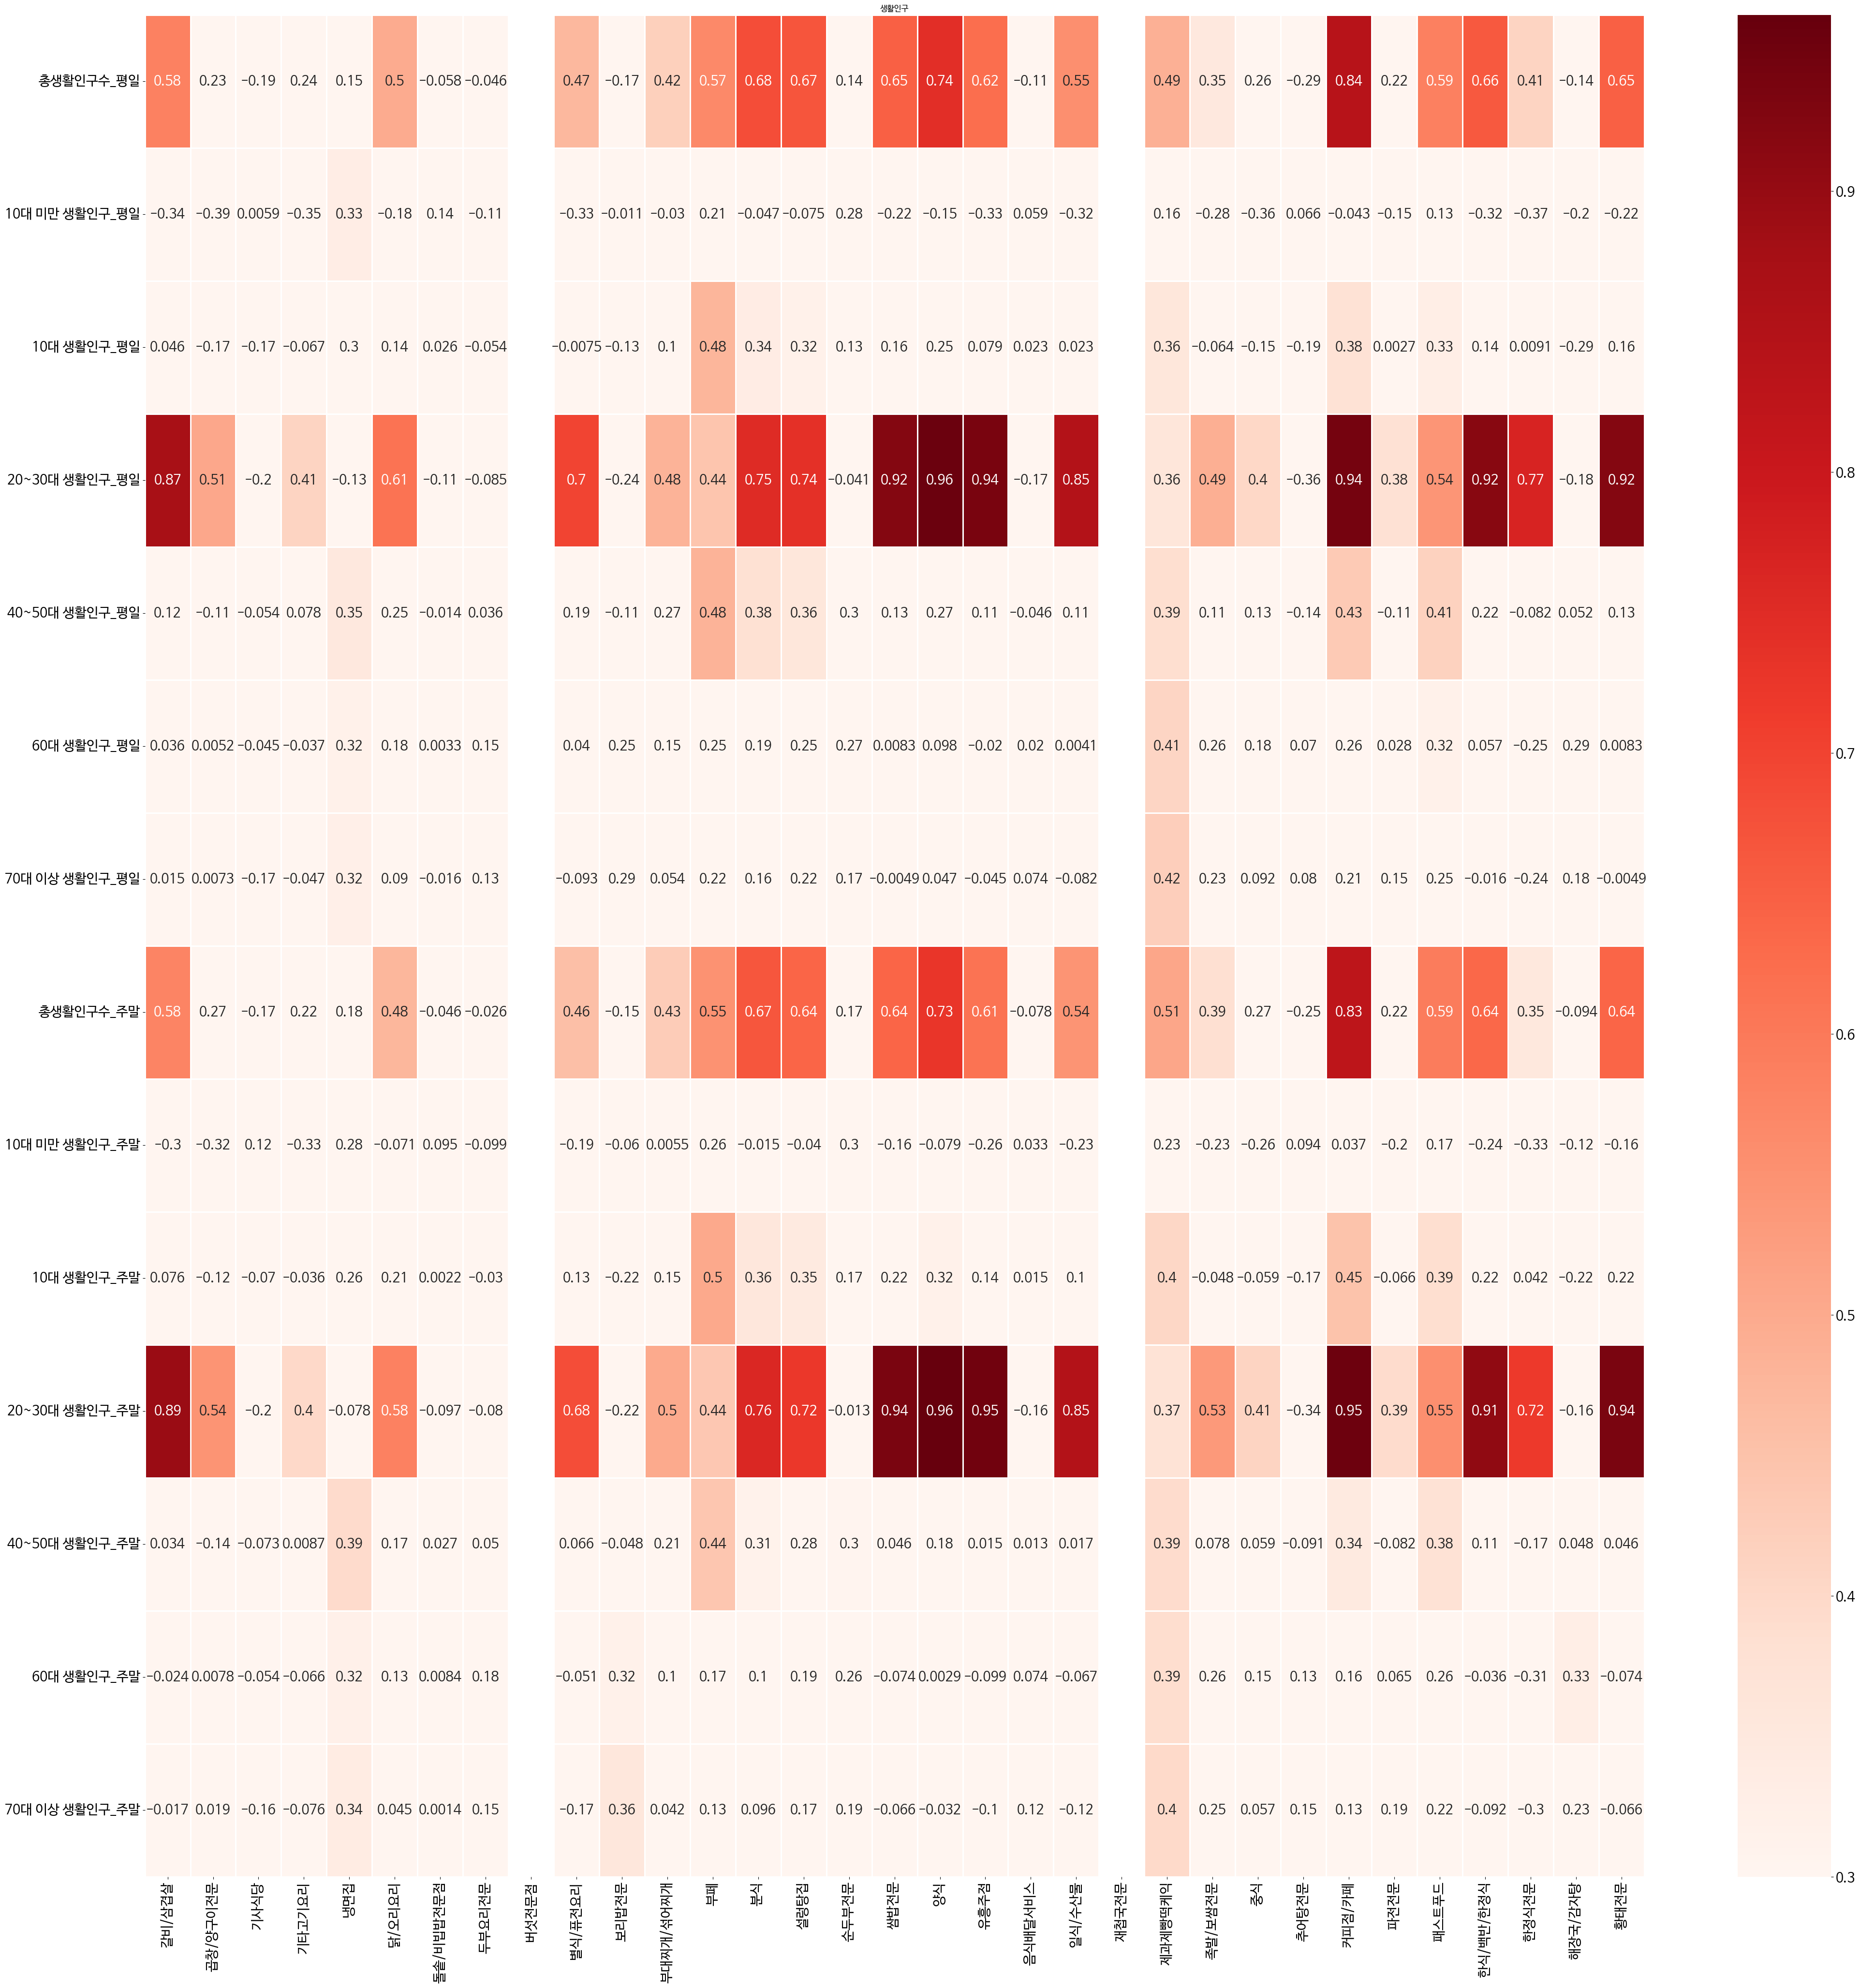

In [11]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,50))
sns.heatmap(life_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("생활인구")
plt.show()

In [12]:
result_life.groupby('업종')['변수'].count()

업종
갈비/삼겹살        6
곱창/양구이전문      4
기타고기요리        4
냉면집           8
닭/오리요리        4
별식/퓨전요리       5
보리밥전문         2
부대찌개/섞어찌개     4
부페            8
분식            8
설렁탕집          7
순두부전문         1
쌈밥전문          4
양식            5
유흥주점          5
일식/수산물        5
제과제빵떡케익      12
족발/보쌈전문       4
중식            3
추어탕전문         2
커피점/카페        8
파전전문          2
패스트푸드         9
한식/백반/한정식     5
한정식전문         8
해장국/감자탕       1
황태전문          4
Name: 변수, dtype: int64

- 생활인구 데이터의 전체 변수 개수: **14개**
- 생활인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 생활인구 데이터의 대부분의 변수들은 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교해서 **광진구**에서의 각 변수들과 업종별 업소 수의 상관관계가 약하다. 

### **b) 대학정보**

In [13]:
### 필요한 데이터 추출

df_univ = pd.concat([df.iloc[:,0:35],df.iloc[:,49:52]],axis = 1)
df_univ.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,대학교(전체),일반대학,온라인대학
0,광진구,화양동,37,8,0,3,1,24,0,0,...,146,2,29,149,1,1,2,1,1,0
1,광진구,군자동,12,1,0,3,0,25,0,0,...,66,1,15,84,1,2,0,1,1,0
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,30,0,6,55,0,3,0,0,0,0
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,42,0,12,61,0,4,0,0,0,0
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,32,0,12,45,0,3,0,0,0,0


In [14]:
### 상관계수 파악

univ_corr = df_univ.corr().iloc[33:,:33]
univ_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
대학교(전체),0.379507,0.099959,-0.25,0.202465,-0.227429,0.553363,-0.133631,-0.232495,NaN,0.357964,...,0.038027,0.07611,-0.377415,0.660689,0.211289,0.223523,0.583012,0.784465,-0.559017,0.534522
일반대학,0.379507,0.099959,-0.25,0.202465,-0.227429,0.553363,-0.133631,-0.232495,NaN,0.357964,...,0.038027,0.07611,-0.377415,0.660689,0.211289,0.223523,0.583012,0.784465,-0.559017,0.534522
온라인대학,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_univ = selection(univ_corr)
result_univ.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,대학교(전체),0.379507
1,갈비/삼겹살,일반대학,0.379507
2,닭/오리요리,대학교(전체),0.553363
3,닭/오리요리,일반대학,0.553363
4,별식/퓨전요리,대학교(전체),0.357964
5,별식/퓨전요리,일반대학,0.357964
6,보리밥전문,대학교(전체),-0.327327
7,보리밥전문,일반대학,-0.327327
8,부페,대학교(전체),0.639362
9,부페,일반대학,0.639362


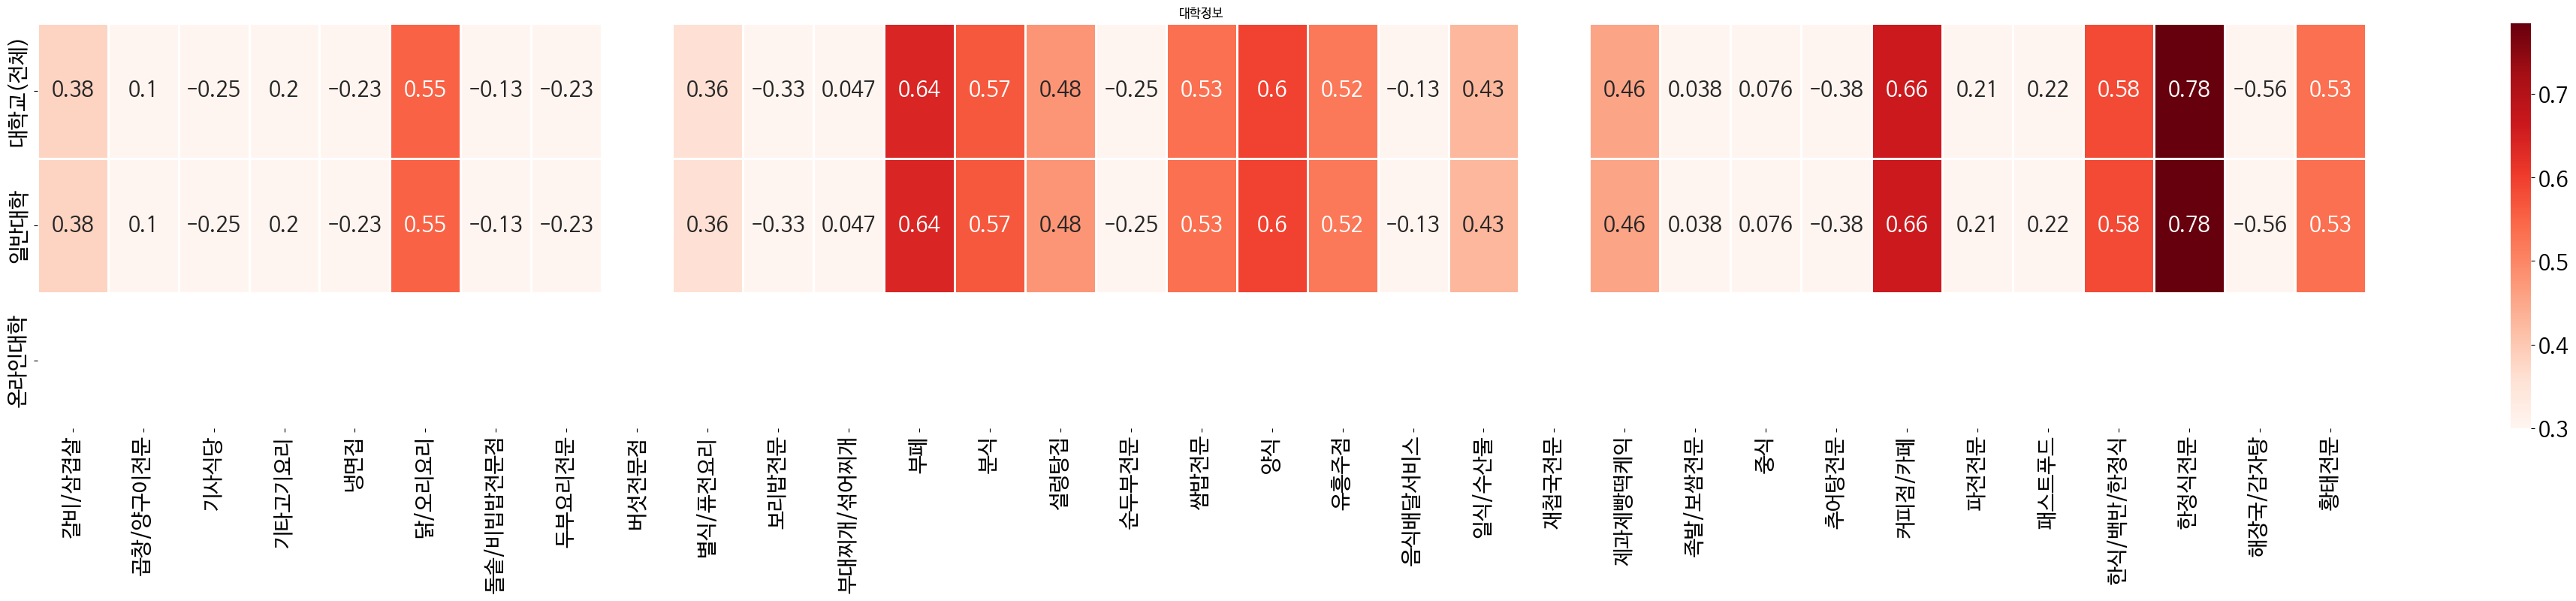

In [16]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(univ_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("대학정보")
plt.show()

In [17]:
result_univ.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
닭/오리요리       2
별식/퓨전요리      2
보리밥전문        2
부페           2
분식           2
설렁탕집         2
쌈밥전문         2
양식           2
유흥주점         2
일식/수산물       2
제과제빵떡케익      2
추어탕전문        2
커피점/카페       2
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      2
황태전문         2
Name: 변수, dtype: int64

- 대학정보 데이터의 전체 변수 개수: **3개**
- 대학정보 데이터의 경우 변수들과의 상관계수가 0.3 이상인 업종이 상당수 존재한다.
    - 하지만, 광진구에 존재하는 대학의 수는 **3개**이기 때문에, 대학 수가 업종들의 업소 수와 강한 상관관계가 있다고 단정짓기는 힘들다.

### **c) 초중고학교정보**

In [18]:
### 필요한 데이터 추출

df_school = pd.concat([df.iloc[:,0:35],df.iloc[:,52:56]],axis = 1)
df_school.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,초중고(전체),초등학교,중학교,고등학교
0,광진구,화양동,37,8,0,3,1,24,0,0,...,2,29,149,1,1,2,5,2,2,1
1,광진구,군자동,12,1,0,3,0,25,0,0,...,1,15,84,1,2,0,2,2,0,0
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,0,6,55,0,3,0,0,0,0,0
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,0,12,61,0,4,0,1,1,0,0
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,0,12,45,0,3,0,2,2,0,0


In [19]:
### 상관계수 파악

school_corr = df_school.corr().iloc[33:,:33]
school_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
초중고(전체),0.066308,-0.062704,-0.489547,-0.230937,0.060730,-0.180947,0.134802,-0.282819,NaN,-0.394480,...,-0.057164,-0.218823,-0.099180,0.218787,0.388668,0.046558,-0.090073,0.110555,-0.613674,0.253745
초등학교,-0.196494,-0.255662,-0.367884,-0.171036,-0.055778,-0.315466,0.131095,-0.092659,NaN,-0.438963,...,-0.589106,-0.390792,-0.026447,0.018295,0.181369,0.099572,-0.153344,0.192394,-0.719786,0.131095
중학교,0.232400,0.075787,-0.408248,-0.082656,0.170221,-0.009613,0.054554,-0.261018,NaN,-0.125261,...,0.191466,0.074172,-0.176090,0.409421,0.258775,0.048420,0.106795,0.080064,-0.456435,0.327327
고등학교,0.168670,0.078539,-0.375000,-0.314945,0.037905,-0.067699,0.133631,-0.348743,NaN,-0.357964,...,0.405616,-0.174317,-0.026958,0.088210,0.528221,-0.063864,-0.175373,-0.049029,-0.186339,0.133631


In [20]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_school = selection(school_corr)
result_school.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,기사식당,초등학교,-0.367884
1,기사식당,고등학교,-0.375000
2,기사식당,중학교,-0.408248
3,기사식당,초중고(전체),-0.489547
4,기타고기요리,고등학교,-0.314945
5,닭/오리요리,초등학교,-0.315466
6,두부요리전문,고등학교,-0.348743
7,별식/퓨전요리,고등학교,-0.357964
8,별식/퓨전요리,초중고(전체),-0.394480
9,별식/퓨전요리,초등학교,-0.438963


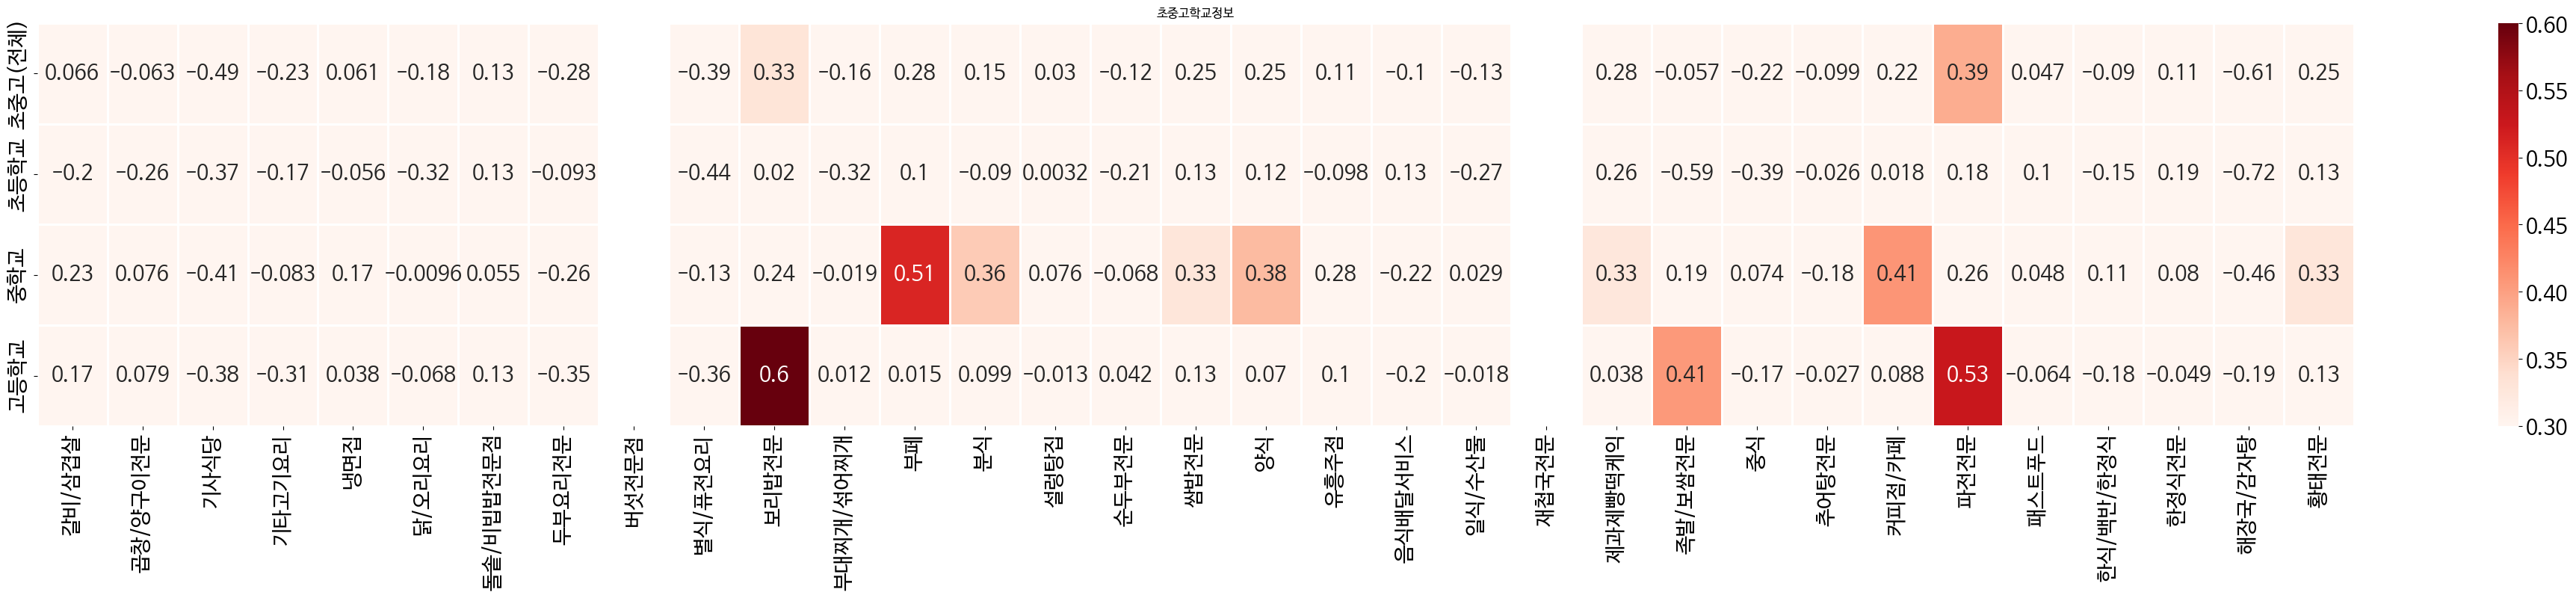

In [21]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(school_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("초중고학교정보")
plt.show()

In [22]:
result_school.groupby('업종')['변수'].count()

업종
기사식당         4
기타고기요리       1
닭/오리요리       1
두부요리전문       1
별식/퓨전요리      3
보리밥전문        2
부대찌개/섞어찌개    1
부페           1
분식           1
쌈밥전문         1
양식           1
제과제빵떡케익      1
족발/보쌈전문      2
중식           1
커피점/카페       1
파전전문         2
해장국/감자탕      3
황태전문         1
Name: 변수, dtype: int64

- 초중고학교정보 데이터의 전체 변수 개수: **4개**
- 초중고학교정보 데이터의 경우 상당수의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **광진구**에서 초중고학교정보 데이터는 각 업종의 업소 수와 상당히 뚜렷한 상관관계가 있다고 할 수 있다.

### **d) 소득정보**

In [23]:
### 필요한 데이터 추출

df_income = pd.concat([df.iloc[:,0:35],df.iloc[:,56:60]],axis = 1)
df_income.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,총인구수,총가구수,가구당인구수,평균소득금액
0,광진구,화양동,37,8,0,3,1,24,0,0,...,2,29,149,1,1,2,28124,18354,1.53,6177.50
1,광진구,군자동,12,1,0,3,0,25,0,0,...,1,15,84,1,2,0,22308,11316,1.97,5455.82
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,0,6,55,0,3,0,15493,7639,2.03,5054.02
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,0,12,61,0,4,0,21513,9857,2.18,5054.02
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,0,12,45,0,3,0,16289,7733,2.11,5054.02


In [24]:
### 상관계수 파악

income_corr = df_income.corr().iloc[33:,:33]
income_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
총인구수,0.148189,0.006796,-0.166259,-0.018673,0.402706,0.255720,0.198313,0.093321,NaN,-0.036129,...,0.056682,0.037472,0.037294,0.450235,0.178113,0.525172,0.248215,0.111917,-0.032206,0.213299
총가구수,0.789100,0.477033,-0.215549,0.376775,0.131007,0.598666,-0.051466,0.033275,NaN,0.480174,...,0.507862,0.342771,-0.131983,0.884931,0.470367,0.651569,0.809977,0.618189,-0.042807,0.782284
가구당인구수,-0.643547,-0.484219,0.020175,-0.454112,0.408373,-0.342658,0.371073,0.069934,NaN,-0.568195,...,-0.504769,-0.344548,0.187691,-0.334504,-0.286771,0.020114,-0.523335,-0.502142,-0.042037,-0.503914
평균소득금액,0.261490,0.103604,-0.243977,0.055295,-0.122990,0.029070,-0.108829,0.076229,NaN,0.117487,...,0.032974,-0.054925,-0.359615,0.305725,0.317506,0.255263,0.121726,0.126633,-0.282616,0.266143


In [25]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_income = selection(income_corr)
result_income.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,총가구수,0.789100
1,갈비/삼겹살,가구당인구수,-0.643547
2,곱창/양구이전문,총가구수,0.477033
3,곱창/양구이전문,가구당인구수,-0.484219
4,기타고기요리,총가구수,0.376775
5,기타고기요리,가구당인구수,-0.454112
6,냉면집,가구당인구수,0.408373
7,냉면집,총인구수,0.402706
8,닭/오리요리,총가구수,0.598666
9,닭/오리요리,가구당인구수,-0.342658


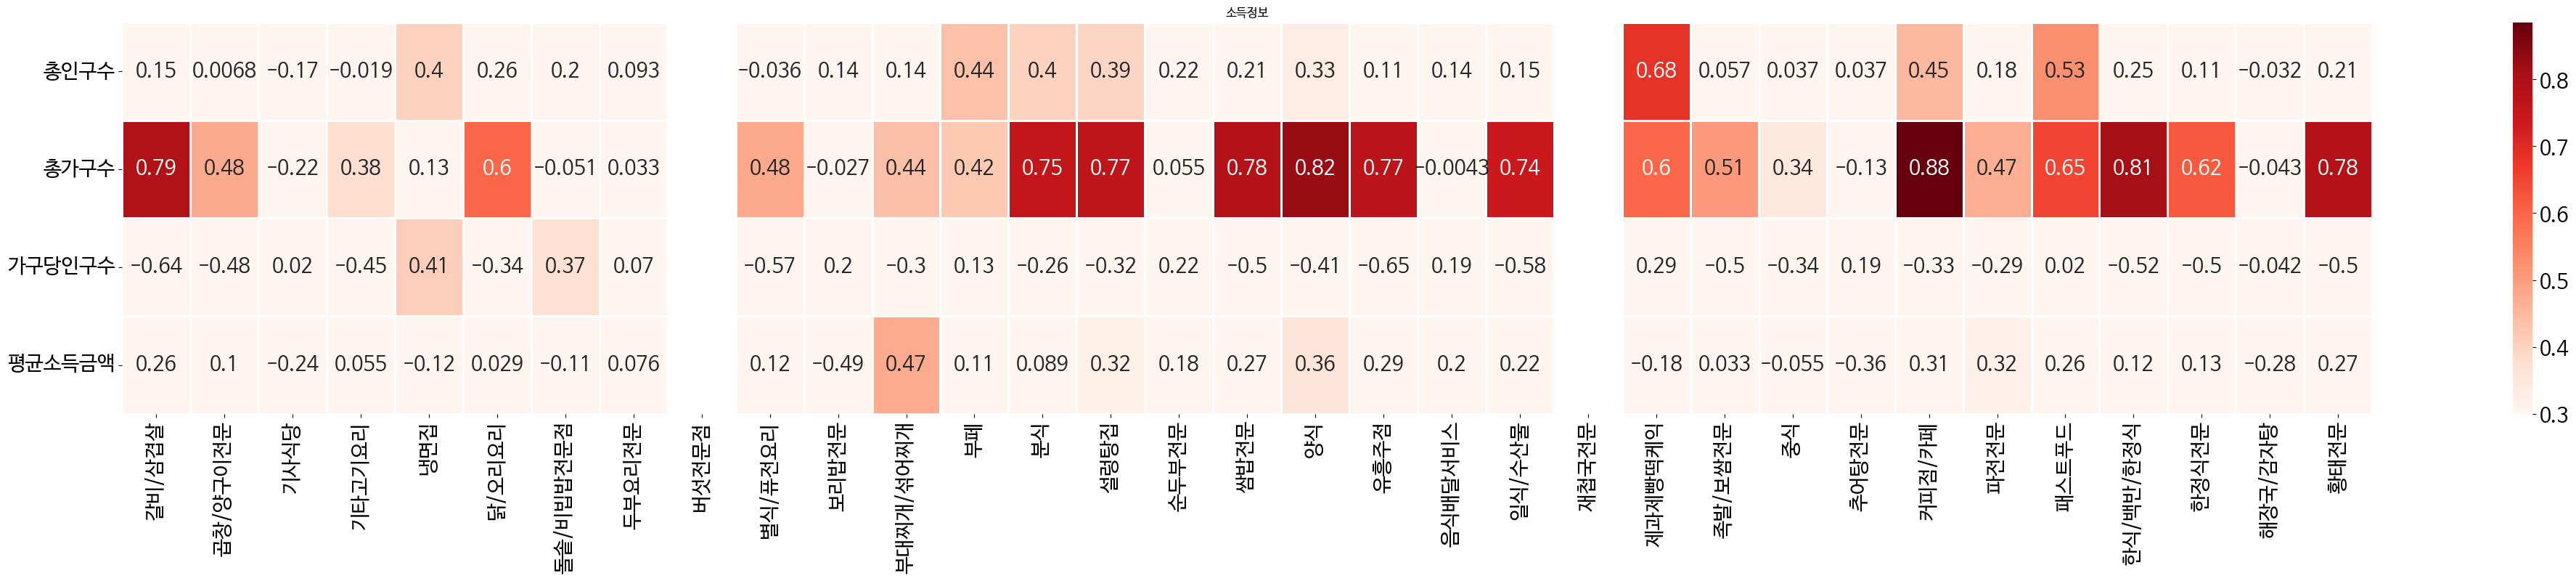

In [26]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,7))
sns.heatmap(income_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("소득정보")
plt.show()

In [27]:
result_income.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     2
기타고기요리       2
냉면집          2
닭/오리요리       2
돌솥/비빕밥전문점    1
별식/퓨전요리      2
보리밥전문        1
부대찌개/섞어찌개    3
부페           2
분식           2
설렁탕집         4
쌈밥전문         2
양식           4
유흥주점         2
일식/수산물       2
제과제빵떡케익      2
족발/보쌈전문      2
중식           2
추어탕전문        1
커피점/카페       4
파전전문         2
패스트푸드        2
한식/백반/한정식    2
한정식전문        2
황태전문         2
Name: 변수, dtype: int64

- 소득정보 데이터의 전체 변수 개수: **4개**
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 소득정보 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **광진구**에서 소득정보 데이터는 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **e) 상권변화지표**

In [28]:
### 필요한 데이터 추출

df_change = pd.concat([df.iloc[:,0:35],df.iloc[:,60:63]],axis = 1)
df_change.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,상권변화지표,운영점포영업개월,폐업점포영업개월
0,광진구,화양동,37,8,0,3,1,24,0,0,...,146,2,29,149,1,1,2,LL,100.0,52.0
1,광진구,군자동,12,1,0,3,0,25,0,0,...,66,1,15,84,1,2,0,LL,115.0,54.0
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,30,0,6,55,0,3,0,LL,117.0,54.0
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,42,0,12,61,0,4,0,LL,116.0,51.0
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,32,0,12,45,0,3,0,LL,112.0,51.0


In [29]:
### 상관계수 파악
# 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음

change_corr = df_change.corr().iloc[33:,:33]
change_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
운영점포영업개월,-0.332839,-0.530604,0.416142,-0.059189,0.113979,-0.001264,-0.064579,-0.221591,NaN,-0.123564,...,-0.015654,-0.161626,0.324249,-0.422026,-0.351704,-0.018126,-0.407346,-0.437020,0.500280,-0.566856
폐업점포영업개월,-0.296767,-0.001803,0.015780,-0.254169,-0.021533,0.128565,-0.033739,0.546643,NaN,-0.293728,...,-0.130412,-0.152800,0.108902,-0.167258,0.213383,0.181685,-0.251524,-0.235196,0.141139,-0.286779


In [30]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_change = selection(change_corr)
result_change.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,운영점포영업개월,-0.332839
1,곱창/양구이전문,운영점포영업개월,-0.530604
2,기사식당,운영점포영업개월,0.416142
3,두부요리전문,폐업점포영업개월,0.546643
4,부페,운영점포영업개월,-0.354233
5,분식,폐업점포영업개월,-0.337554
6,순두부전문,운영점포영업개월,0.528008
7,쌈밥전문,운영점포영업개월,-0.566856
8,양식,운영점포영업개월,-0.514818
9,유흥주점,폐업점포영업개월,-0.343886


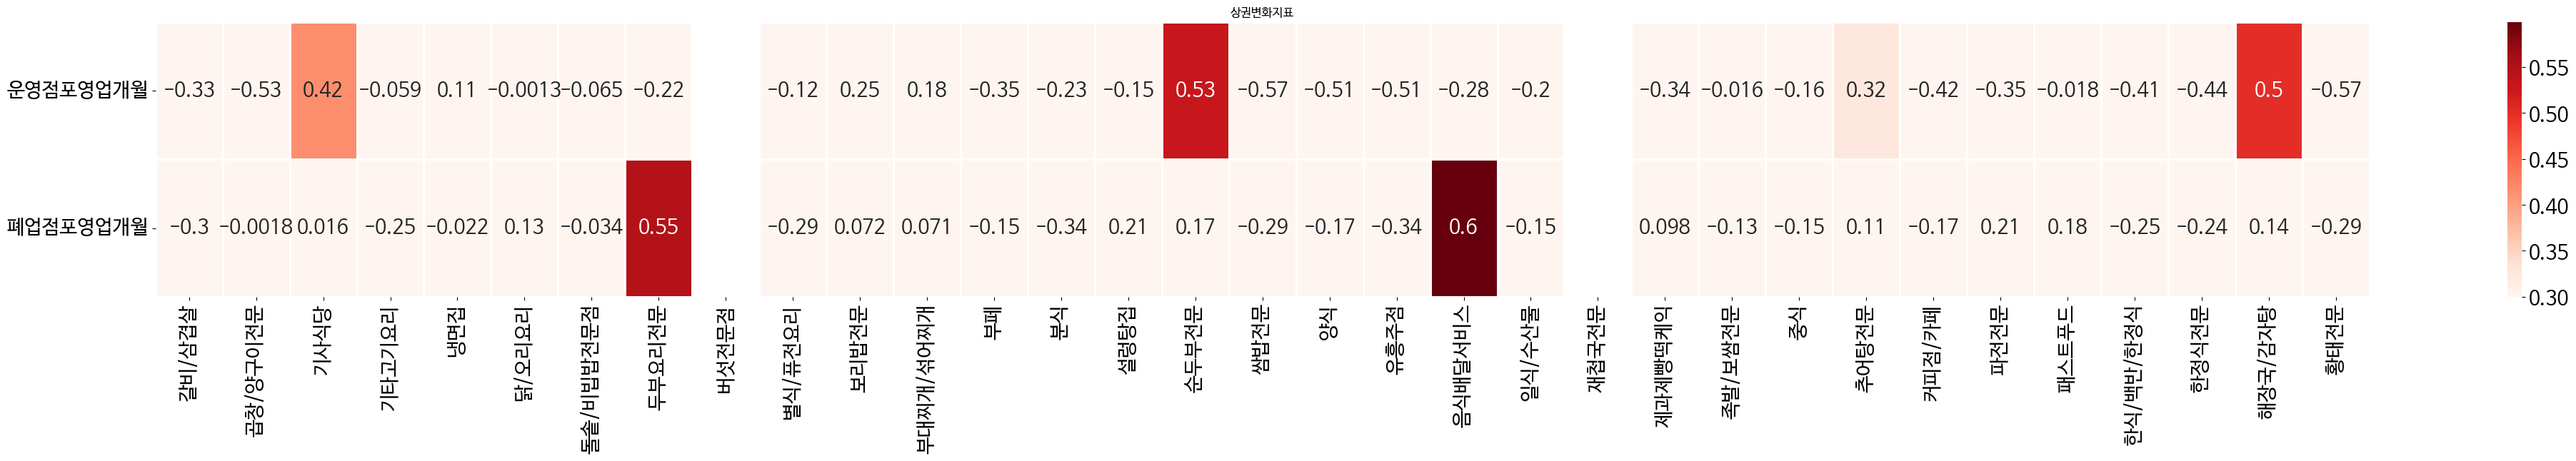

In [31]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(change_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("상권변화지표")
plt.show()

In [32]:
result_change.groupby('업종')['변수'].count()

업종
갈비/삼겹살       1
곱창/양구이전문     1
기사식당         1
두부요리전문       1
부페           1
분식           1
순두부전문        1
쌈밥전문         1
양식           1
유흥주점         2
음식배달서비스      1
제과제빵떡케익      1
추어탕전문        1
커피점/카페       1
파전전문         1
한식/백반/한정식    1
한정식전문        1
해장국/감자탕      1
황태전문         1
Name: 변수, dtype: int64

- 상권변화지표 데이터의 전체 변수 개수: **3개**  
(단, 상권변화지표의 경우 문자형(object형) -> 상관계수를 계산할 수 없음)  
- 상권변화지표 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상이다.  
- 서울시 전체와 다르게 **광진구**에서는 상권변화지표 데이터는 각 업종의 업소 수와 강한 상관관계가 있다고 할 수 있다.

### **f) 주민등록인구**

In [33]:
### 필요한 데이터 추출

df_population = pd.concat([df.iloc[:,0:35],df.iloc[:,63:70]],axis = 1)
df_population.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,한정식전문,해장국/감자탕,황태전문,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구
0,광진구,화양동,37,8,0,3,1,24,0,0,...,1,1,2,359,904,17933,4334,1739,1540,26809
1,광진구,군자동,12,1,0,3,0,25,0,0,...,1,2,0,813,1054,9473,5369,2525,2032,21266
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,0,3,0,652,696,5831,4522,2207,1645,15553
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,0,4,0,976,1333,7462,6429,3013,2173,21386
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,0,3,0,667,880,5303,4986,2423,1902,16161


In [34]:
### 상관계수 파악

population_corr = df_population.corr().iloc[33:,:33]
population_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
10대 미만,-0.435321,-0.440616,-0.036114,-0.337578,0.494411,-0.202861,0.406281,0.032026,NaN,-0.446770,...,-0.406199,-0.298872,0.069026,-0.103885,-0.205442,0.227546,-0.328330,-0.354913,-0.072253,-0.337928
10대,-0.305237,-0.357886,-0.086978,-0.242382,0.411006,-0.080437,0.184521,0.021181,NaN,-0.303338,...,-0.324703,-0.283908,-0.011675,0.041853,-0.157170,0.190990,-0.171724,-0.233227,-0.221281,-0.176032
20 ~ 30대,0.901253,0.510141,-0.137632,0.395813,0.039164,0.643947,-0.051942,-0.108306,NaN,0.577487,...,0.555029,0.268546,-0.179162,0.924976,0.487795,0.675786,0.884693,0.739777,-0.086758,0.891672
40 ~ 50대,-0.316952,-0.324341,-0.082790,-0.195730,0.514409,-0.086908,0.222146,0.136658,NaN,-0.370686,...,-0.207176,-0.172599,0.118220,-0.038485,-0.101073,0.226884,-0.238479,-0.358424,0.044909,-0.300780
60대,-0.342195,-0.168035,-0.019680,-0.209584,0.387120,-0.113846,0.239590,0.235737,NaN,-0.419020,...,-0.052386,0.002408,0.365234,-0.219863,0.021691,0.120186,-0.340868,-0.414006,0.370914,-0.408655
70대 이상,-0.275802,-0.123096,-0.080841,-0.154540,0.406013,-0.036567,0.239664,0.298735,NaN,-0.393152,...,-0.011322,-0.003847,0.301870,-0.143866,0.098124,0.212343,-0.258187,-0.340028,0.374454,-0.347992
총인구,0.137426,-0.037222,-0.139054,-0.014509,0.477798,0.233616,0.210832,0.075252,NaN,-0.075542,...,0.074855,-0.028177,0.047528,0.408650,0.164500,0.547537,0.204013,0.043644,0.012579,0.160018


In [35]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_population = selection(population_corr)
result_population.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,20 ~ 30대,0.901253
1,갈비/삼겹살,10대,-0.305237
2,갈비/삼겹살,40 ~ 50대,-0.316952
3,갈비/삼겹살,60대,-0.342195
4,갈비/삼겹살,10대 미만,-0.435321
...,...,...,...
79,황태전문,20 ~ 30대,0.891672
80,황태전문,40 ~ 50대,-0.300780
81,황태전문,10대 미만,-0.337928
82,황태전문,70대 이상,-0.347992


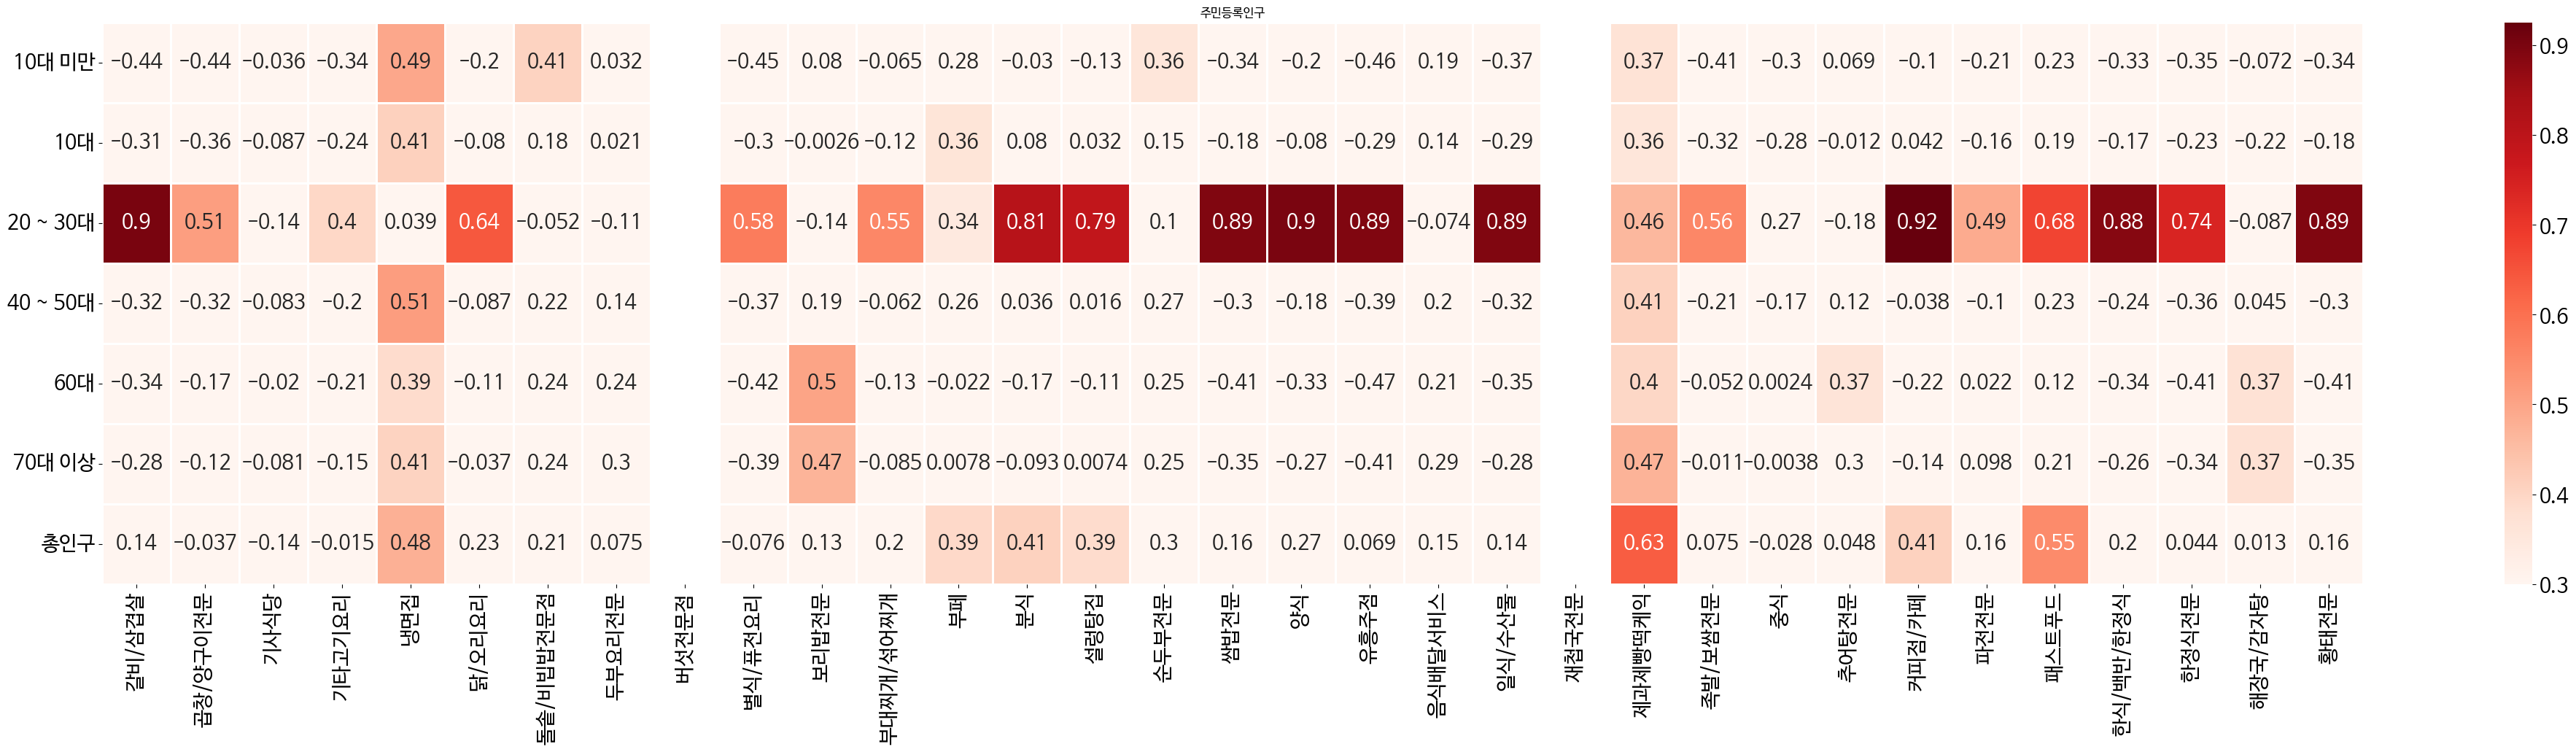

In [36]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,10))
sns.heatmap(population_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("주민등록인구")
plt.show()

In [37]:
result_population.groupby('업종')['변수'].count()

업종
갈비/삼겹살       5
곱창/양구이전문     4
기타고기요리       2
냉면집          6
닭/오리요리       1
돌솥/비빕밥전문점    1
별식/퓨전요리      6
보리밥전문        2
부대찌개/섞어찌개    1
부페           3
분식           2
설렁탕집         2
순두부전문        1
쌈밥전문         5
양식           2
유흥주점         5
일식/수산물       4
제과제빵떡케익      7
족발/보쌈전문      3
추어탕전문        2
커피점/카페       2
파전전문         1
패스트푸드        2
한식/백반/한정식    3
한정식전문        5
해장국/감자탕      2
황태전문         5
Name: 변수, dtype: int64

- 주민등록인구 데이터의 전체 변수 개수: **7개**
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 주민등록인구 데이터의 경우 대부분의 변수들이 각 업종의 업소 수와 뚜렷한 상관관계가 있다고 할 수 있다.
- 서울시 전체와 비교하였을 때 **광진구**에서의 주민등록인구 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.

### **g) 지하철**

In [38]:
### 필요한 데이터 추출

df_subway = pd.concat([df.iloc[:,0:35],df.iloc[:,70:]],axis = 1)
df_subway.head()

,행정구,행정동,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,...,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문,역(전체),역(환승역)
0,광진구,화양동,37,8,0,3,1,24,0,0,...,0,146,2,29,149,1,1,2,3,2
1,광진구,군자동,12,1,0,3,0,25,0,0,...,0,66,1,15,84,1,2,0,0,0
2,광진구,중곡1동,9,4,1,0,1,19,0,0,...,1,30,0,6,55,0,3,0,0,0
3,광진구,중곡2동,10,3,1,1,2,12,0,0,...,2,42,0,12,61,0,4,0,0,0
4,광진구,중곡3동,7,1,0,3,1,7,0,0,...,0,32,0,12,45,0,3,0,1,0


In [39]:
### 상관계수 파악

subway_corr = df_subway.corr().iloc[33:,:33]
subway_corr

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,족발/보쌈전문,중식,추어탕전문,커피점/카페,파전전문,패스트푸드,한식/백반/한정식,한정식전문,해장국/감자탕,황태전문
역(전체),0.459241,0.175557,-0.200446,-0.003006,-0.182349,0.011013,0.071429,-0.341753,NaN,0.314344,...,0.199873,-0.075132,-0.446703,0.487009,0.225877,0.282846,0.313828,0.301382,-0.336158,0.607143
역(환승역),0.504453,0.414476,-0.196116,-0.061766,-0.401423,0.087742,-0.104828,-0.182384,NaN,0.320926,...,0.228700,0.016371,-0.296068,0.462557,0.414371,0.094830,0.360729,0.423077,-0.438529,0.681385


In [40]:
### 각 업종별로 상관계수가 높은 변수 확인하기
# 업종은 오름차순, 상관계수는 내림차순

result_subway = selection(subway_corr)
result_subway.sort_values(by = ['업종','상관계수'],ascending = [True, False]).reset_index(drop = True)

,업종,변수,상관계수
0,갈비/삼겹살,역(환승역),0.504453
1,갈비/삼겹살,역(전체),0.459241
2,곱창/양구이전문,역(환승역),0.414476
3,냉면집,역(환승역),-0.401423
4,두부요리전문,역(전체),-0.341753
5,별식/퓨전요리,역(환승역),0.320926
6,별식/퓨전요리,역(전체),0.314344
7,보리밥전문,역(전체),-0.371798
8,부대찌개/섞어찌개,역(전체),0.413017
9,분식,역(전체),0.309033


- 광진구의 경우 다른 행정구에 비해 환승역의 수가 많다.
    - 각 업종별 업소 수와 환승역 개수 간의 상관계수가 매우 강한 양의 상관관계를 보인다.

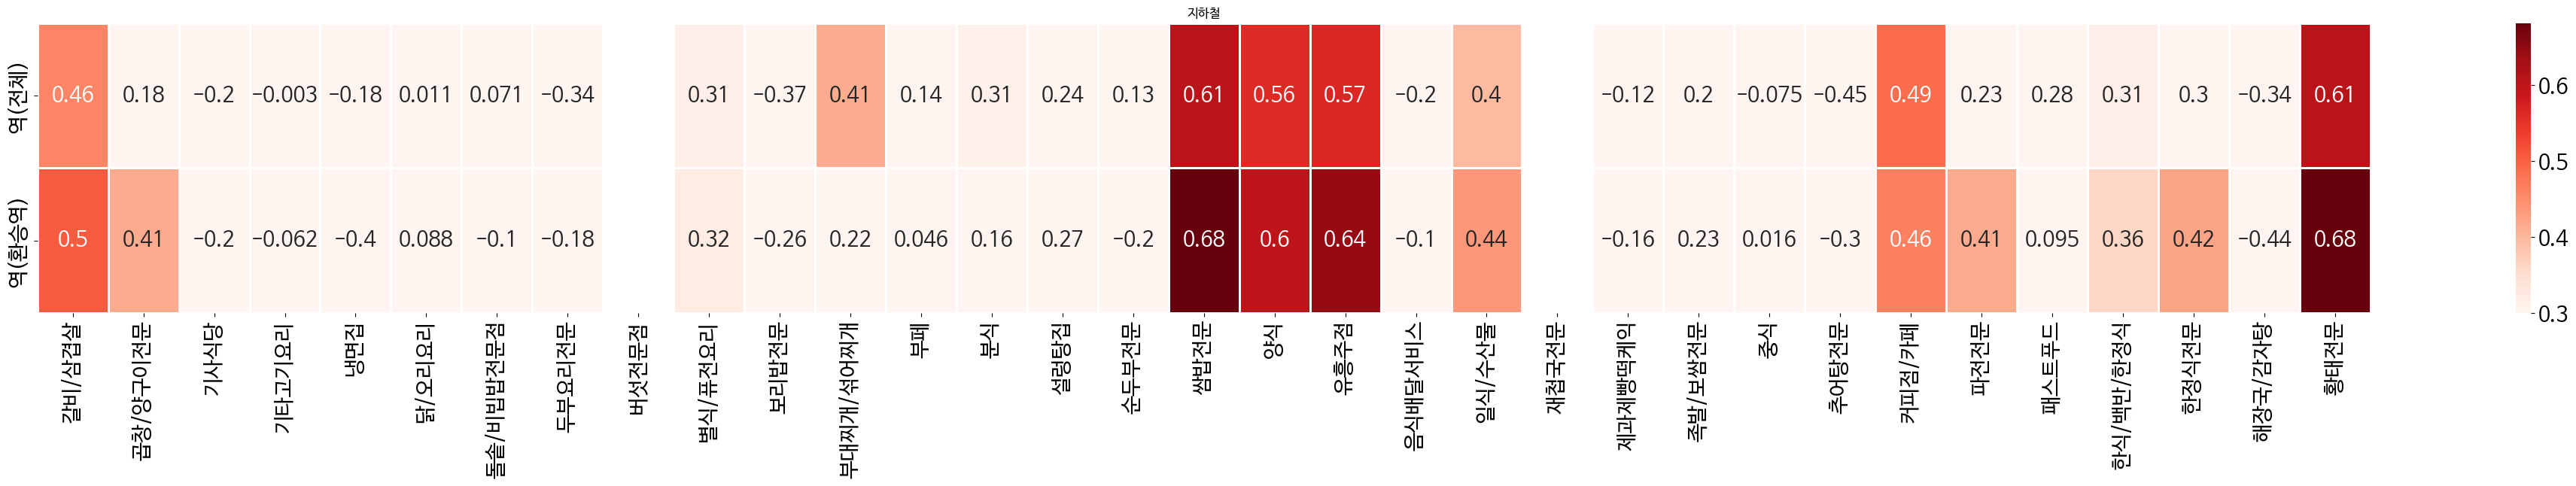

In [41]:
### 시각화
# annot: 각 cell의 값 표시 여부
# linewidths: cell 사이의 선 간격

# 상관계수의 절댓값이 0.3 이상인 변수들만 색으로 표시
plt.figure(figsize = (50,5))
sns.heatmap(subway_corr,annot = True, vmin = 0.3, linewidths = 1, annot_kws={"size": 20}, cmap = 'Reds')
plt.title("지하철")
plt.show()

In [42]:
result_subway.groupby('업종')['변수'].count()

업종
갈비/삼겹살       2
곱창/양구이전문     1
냉면집          1
두부요리전문       1
별식/퓨전요리      2
보리밥전문        1
부대찌개/섞어찌개    1
분식           1
쌈밥전문         2
양식           2
유흥주점         2
일식/수산물       2
추어탕전문        1
커피점/카페       2
파전전문         1
한식/백반/한정식    2
한정식전문        2
해장국/감자탕      2
황태전문         2
Name: 변수, dtype: int64

- 지하철 데이터의 전체 변수 개수: **2개**
- 지하철 데이터의 경우 대부분의 변수들이 각 업종들과의 상관계수가 0.3 이상임을 확인할 수 있다.
- 서울시 전체와 비교하였을 때 **광진구**에서의 지하철 데이터가 각 업종별 업소 수와 상관관계가 더 크다고 할 수 있다.